In [6]:
# importing necessary modules and libraries

import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import numpy as np

%matplotlib inline


In [7]:


main_dataset = pd.read_csv("../../datasets/medical-charges.csv")

In [8]:
main_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
import seaborn as sns
import plotly.express as px


In [10]:
main_dataset.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
main_dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
import plotly.io as pio

# Use the default browser renderer
# pio.renderers.default = 'vscode'

In [13]:


fig = px.histogram(main_dataset, x="age", marginal="box", nbins=47, title="Age Distribution")
fig.update_layout(bargap = 0.1)
fig.show()


In [14]:
fig = px.histogram(main_dataset, 
                   x="bmi", 
                   marginal="box", 
                   nbins=47, 
                   title="BMI Distribution",
                   color_discrete_sequence= ['red'])
fig.update_layout(bargap = 0.1)
fig.show()

In [15]:
fig = px.histogram(main_dataset, 
                   x="charges", 
                   marginal="box", 
                   nbins=47, 
                   title="Annual Medical Charges",
                   color = "smoker",
                   color_discrete_sequence= ['green', 'grey'])
fig.update_layout(bargap = 0.1)
fig.show()

In [16]:
fig = px.histogram(main_dataset,
                   x = "charges",
                   marginal="box",
                   nbins=47,
                   title="Distribution of Charges according to Gender",
                   color="sex",
                   color_discrete_sequence=["pink", "DodgerBlue"])
fig.update_layout(bargap = 0.1)
fig.show()

In [17]:
subdata = main_dataset.groupby("region")[["charges"]].sum()
type(subdata.index)


pandas.core.indexes.base.Index

In [18]:
'''fig = px.histogram(
    main_dataset, 
    x = "charges",
    color="region",
    color_discrete_sequence=["slateblue", "plum", "powderblue", "lightseagreen"],
    nbins = 47
)'''


fig = px.histogram(
    subdata, 
    x = "charges",
    color=subdata.index,
    color_discrete_sequence=["slateblue", "plum", "powderblue", "lightseagreen"],
    nbins = 4
)
fig.update_layout(bargap = 0.1)
fig.show()

In [19]:
fig = px.bar(subdata, 
             x = subdata.index,
             y="charges",
             color=subdata.index,
             color_discrete_sequence=["slateblue", "plum", "powderblue", "lightseagreen"],
             title = "Comparison of charges by region"
             )

fig.show()

In [20]:
main_dataset.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [21]:
fig = px.histogram(
    main_dataset,
    x = "smoker",
    color = "sex",
    color_discrete_sequence= ["lightpink", "dodgerblue"],
    
)
fig.update_layout(bargap = 0.1)
fig.show()

In [22]:
fig = px.scatter(
    main_dataset,
    x = "age",
    y = "charges",
    color = "sex",
    color_discrete_sequence=["lightpink", "dodgerblue"],
    opacity = 0.7,
    title = "Relation between age and charges",
    hover_data=["bmi", "smoker"]

)

fig.show()

In [23]:
fig = px.scatter(
    main_dataset,
    x = "bmi",
    y = "charges",
    color = "smoker",
    color_discrete_sequence=[ "rosybrown","lightgreen",],
    opacity = 0.7,
    title = "Relation between bmi and medical charges",
    hover_data=["bmi", "smoker"]

)

fig.show()

### Correlation
- The `.corr` method of a pandas dataframe can be used to compute the correlation coefficient between two columns. 

- The correlation coefficient for categorical columns cannot be computed unless the categorical columns ae converted to numerical columns.

- The correlation coefficient is often represented by $ r $.

- When $r$ falls in the range $ (-1, 1) $ but $r \neq 0$, there is a relationship. However, not all the points fall closer to a line.

- The closer $ r $ is to $ 1 $ or $ -1 $, the stronger the relationship and likelihood of points falling on a line.

- Positive coefficients mean that when the value of one variable increases, the value of the other variable also tends to increase. (Indicating an upward slope on a scatter diagram)

- A negative $r $ on the other hand means when the value of one variable increases, the value of the other variable tends to decrease rather. (Indicating a downward slope).

In [24]:
main_dataset.charges.corr(main_dataset.age)

np.float64(0.2990081933306476)

In [25]:
main_dataset["charges"].corr(main_dataset["bmi"])

np.float64(0.19834096883362878)

In [26]:

smoker_values = {"no": 0, "yes": 1}
smoker_numeric = main_dataset.smoker.map(smoker_values)
main_dataset.charges.corr(smoker_numeric)


np.float64(0.7872514304984782)

In [27]:
test_dataset = main_dataset.copy()
test_dataset.pop("sex")
smoker_values = {"no": 0, "yes": 1}
smoker_numeric = main_dataset.smoker.map(smoker_values)
test_dataset.smoker = smoker_numeric
correlation_table = test_dataset.corr(numeric_only=True)
correlation_table

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

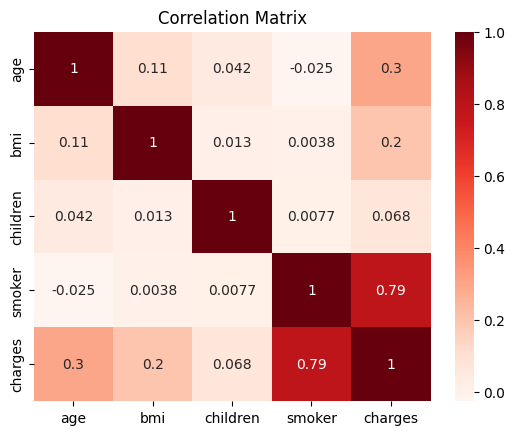

In [28]:
sns.heatmap(correlation_table, cmap='Reds', annot=True)
plt.title('Correlation Matrix')

### Correlation vs Causation Fallacy
- A high correlation cannot be used to interpret a cause-effect relationship between features. 

- Two features X and Y can be correlated if X causes Y or if 
Y causes X. 
Eg. bmi could be the cause of increase in children or increase in children may cause bmi to increase.

- Both could also be caused independently by some other factor Z, and the correlation will no longer hold true if one of the cause-effect relationships is broken. 
Eg. both bmi and children are caused by age.

- It's also possible that X are Y simply appear to be correlated because the sample is too small.

- Computers can't differentiate between correlation and causation.

- Decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. 

- Determining cause-effect relationships requires human insight.

## Linear Regression Using a Single Feature


In [29]:
non_smoker_df = main_dataset[main_dataset.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

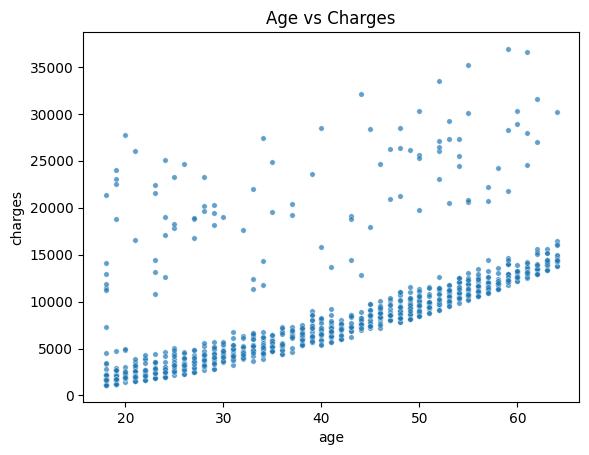

In [30]:
plt.title('Age vs Charges')
sns.scatterplot(data = non_smoker_df,
                x = "age",
                y = "charges", 
                alpha = 0.7,
                s = 15,)

In [31]:
px.scatter(data_frame= non_smoker_df, x="age", y = "charges", opacity=0.6)

In [32]:
def estimate_charges(age, w, b):
    return w * age + b

In [33]:
w = 50
b = 100
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

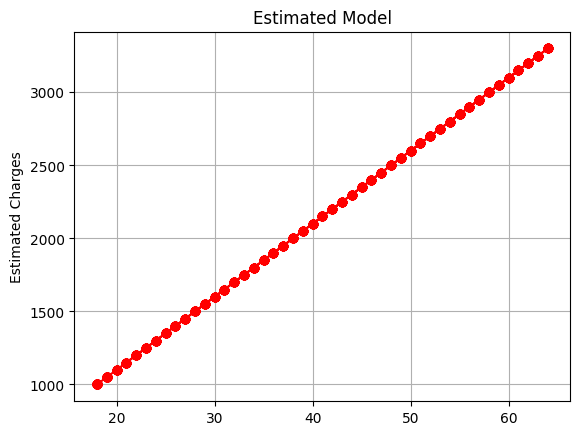

In [34]:
plt.plot(ages, estimated_charges, 'r-o')
#plt.xlabel('Age')
plt.ylabel("Estimated Charges")
plt.title("Estimated Model")
plt.grid(True)
plt.show()

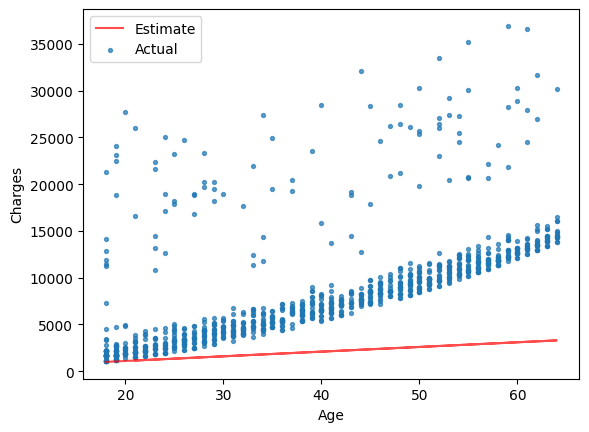

In [35]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, "r", alpha=0.7)
plt.scatter(ages, target, s=8, alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])

In [36]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

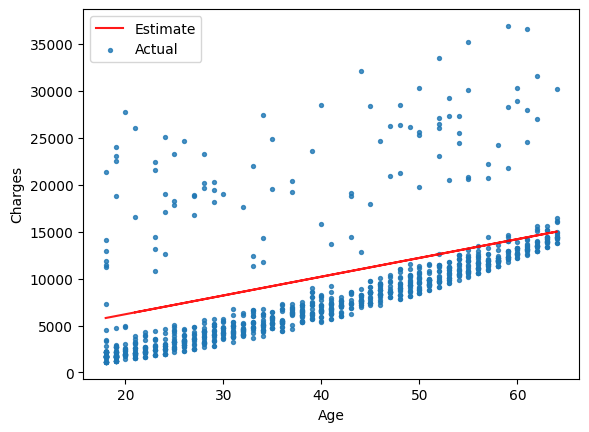

In [37]:
try_parameters(200, 2200)

In [38]:
estimated_charges = estimate_charges(ages, 200, 2200)
difference = (target - estimated_charges).to_numpy(dtype=float)
np.square(difference)

array([1.66011241e+07, 1.12261049e+07, 1.73830265e+08, ...,
       1.29169740e+07, 1.73902886e+07, 1.92901471e+07], shape=(1064,))

In [39]:
def rmse(targets: pd.Series | np.ndarray, predictions: pd.Series | np.ndarray):
    """Function to determine the root mean square error"""
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [40]:
rmse(target, estimated_charges)

np.float64(5033.278636638367)

- The root mean square error means that on average, each prediction differs from the actual value by about `np.float64(5033.278636638367)`
- The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

In [41]:
# modifying try parameters to also display the loss
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss = f"RMSE Loss: {str(round(float(rmse(target, estimated_charges)), 3))}"
    plt.text(plt.xlim()[1] - 8, plt.ylim()[1] - 1400, s=str(loss))
    
    plt.show()


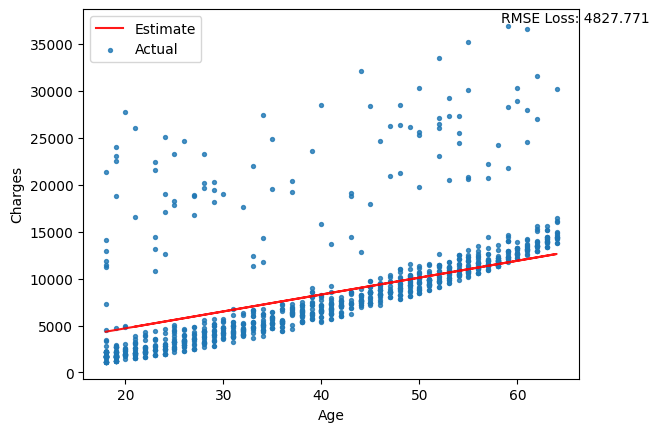

In [42]:
try_parameters(180,1100)

### Optimizers
These are methods used to find the line of best fit for data by adjusting weight and bias.
Ideally, minimizing the loss = improving the fit.

The two main ways to do this are:
1. Ordinary Least Squares
    - It uses matrix operations to calculate values that minimize the loss.
    - It is best for small to medium datasets

2. Stochastic Gradient Descent
    - It uses an iterative approach starting with random values for weight and bias and gradually adjusting them till the best fit is found.
    



In [43]:
# Using Scikit-Learn for linear regression

# Create a new model object
model = sklearn.linear_model.LinearRegression()

help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [44]:
inputs = non_smoker_df[['age']]
model.fit(inputs, target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
main_dataset[["age", "charges"]]

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


In [46]:
model.predict(np.array([[23],
                        [37],
                        [18]]))

c:\Ella-Liza\ing dev\ML-AI-Data Science\ml journey\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([4055.30443855, 7796.78921819, 2719.0598744 ])

In [47]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [48]:
rmse(target, predictions)

np.float64(4662.505766636395)

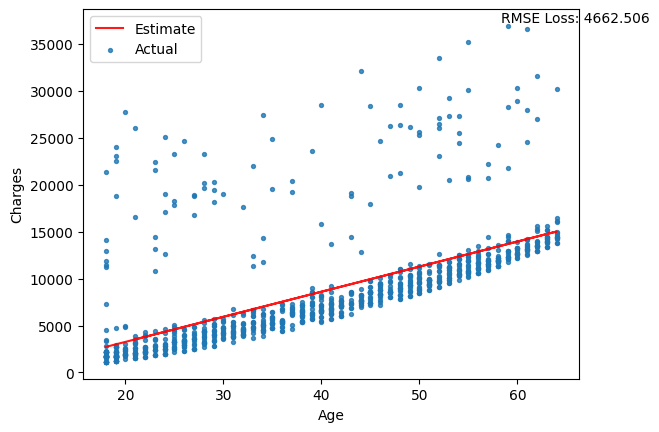

In [49]:
try_parameters(model.coef_, model.intercept_)

In [50]:
# Using Stochastic Gradient Descent

sgd_model = sklearn.linear_model.SGDRegressor()
help(sgd_model.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.

    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.

    y : ndarray of shape (n_samples,)
        Target values.

    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.

    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.

    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).

    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [51]:
sgd_model.fit(inputs, target)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [52]:
predictions = sgd_model.predict(inputs)
rmse(target, predictions)

np.float64(7149.060262280196)

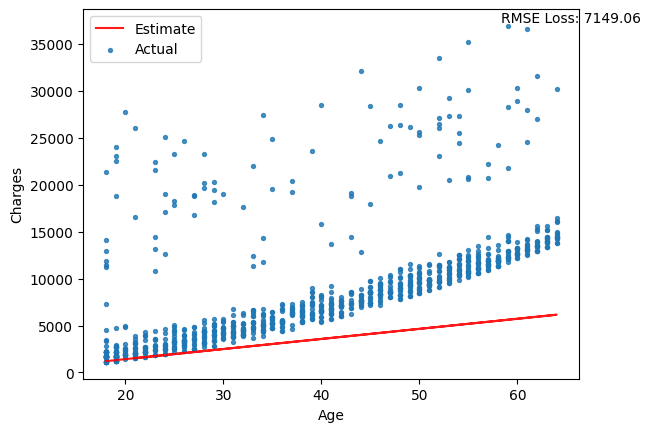

In [53]:
try_parameters(sgd_model.coef_, sgd_model.intercept_)

### Machine Learning Overview
- Machine Learning is basically about computing the best parameters to model the relationship between some feature and targets. 

    - Every ML problem has 3 components:
        * Model (can be a linear or polynomial equation, a decision tree, etc)
        * Cost Function (should tell how well or how bad the model is doing)
        * Optimizer (to change the parameters to reduce loss)
    
    -  You can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply.

### Linear Regression using Multiple Features
- So far, we've only used age to predict charges. We can use bmi as well.

In [54]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# creating a model
model = sklearn.linear_model.LinearRegression()

# training the model
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# evaluate the loss
loss = rmse(targets, predictions)
print("Loss: ", loss)


Loss:  4662.3128354612945


In [55]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [56]:
fig = px.scatter_3d(non_smoker_df, x="age", y="bmi", z="charges")
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [57]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [58]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542183)

In [59]:
fig = px.violin(non_smoker_df, x = "children", y="charges", title = "Number of Children vs Charges")
fig.update_traces(marker_size = 4, marker_opacity = 0.7)
fig.show()

In [60]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# creating a model
model = sklearn.linear_model.LinearRegression()

# training the model
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# evaluate the loss
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  4608.470405038247


In [61]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


### Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

In [62]:
smoker_codes = {'no': 0, 'yes': 1}
main_dataset['smoker_code'] = main_dataset.smoker.map(smoker_codes)


In [63]:
# Create inputs and targets
inputs, targets = main_dataset[['age', 'bmi', 'children', 'smoker_code']], main_dataset['charges']

# Create and train the model
model = sklearn.linear_model.LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081



### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.


In [65]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(main_dataset[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [66]:
one_hot = enc.transform(main_dataset[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [67]:
main_dataset[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
main_dataset

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [69]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = main_dataset[input_cols], main_dataset['charges']

# Create and train the model
model = sklearn.linear_model.LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6042.033215394104
